In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
women_bachelors = pd.read_csv('datasets/percent-bachelors-degrees-women-usa.csv')
women_bachelors.head()

Year  Agriculture  Architecture  Art and Performance    Biology   Business  \
0  1970     4.229798     11.921005                 59.7  29.088363   9.064439   
1  1971     5.452797     12.003106                 59.9  29.394403   9.503187   
2  1972     7.420710     13.214594                 60.4  29.810221  10.558962   
3  1973     9.653602     14.791613                 60.2  31.147915  12.804602   
4  1974    14.074623     17.444688                 61.9  32.996183  16.204850   

   Communications and Journalism  Computer Science  Education  Engineering  \
0                           35.3              13.6  74.535328          0.8   
1                           35.5              13.6  74.149204          1.0   
2                           36.6              14.9  73.554520          1.2   
3                           38.4              16.4  73.501814          1.6   
4                           40.5              18.9  73.336811          2.2   

     English  Foreign Languages  Health Professions  Math and Statistics  \
0  65.570923               73.8                77.1                 38.0   
1  64.556485               73.9                75.5                 39.0   
2  63.664263               74.6                76.9                 40.2   
3  62.941502               74.9                77.4                 40.9   
4  62.413412               75.3                77.9                 41.8   

   Physical Sciences  Psychology  Public Administration  \
0               13.8        44.4                   68.4   
1               14.9        46.2                   65.5   
2               14.8        47.6                   62.6   
3               16.5        50.4                   64.3   
4               18.2        52.6                   66.1   

   Social Sciences and History  
0                         36.8  
1                         36.2  
2                         36.1  
3                         36.4  
4                         37.3

# Different ways to show data
[Why do many examples](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python#:~:text=subplots()%20to%20make%20all,where%20you%20paint%20your%20sketch.&text=Whereas%2C%20you%20can%20use%20plt,to%20add%20the%20subplots%20separately).

## plt.subplots

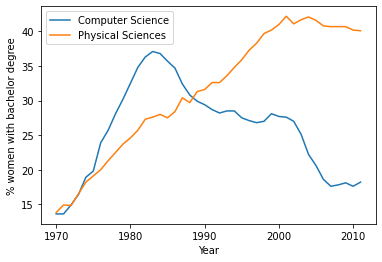

In [3]:
fig, ax = plt.subplots()
ax.plot(women_bachelors['Year'], women_bachelors['Computer Science'], label='Computer Science')
ax.plot(women_bachelors['Year'], women_bachelors['Physical Sciences'], label='Physical Sciences')
ax.set_xlabel('Year')
ax.set_ylabel('% women with bachelor degree')
ax.legend()
plt.show()

## plt.axes([xlo, ylo, width, height])
plots figure of specified size

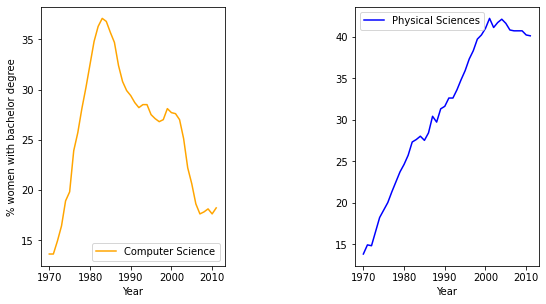

In [4]:
plt.axes([0.05, 0.05, 0.425, 0.9]) # retuns Axes 
plt.plot(women_bachelors['Year'], women_bachelors['Computer Science'], label='Computer Science', color='orange')
plt.xlabel('Year')
plt.ylabel('% women with bachelor degree')
plt.legend()

plt.axes([0.777, 0.05, 0.425, 0.9]) # returns Axes
plt.plot(women_bachelors['Year'], women_bachelors['Physical Sciences'], label='Physical Sciences', color='blue')
plt.xlabel('Year')
plt.legend()
plt.show()

## plt.subplot(m, n, k)
to make the subplot grid of dimensions m by n and to make the k-th subplot active (subplots are numbered starting from 1 row-wise from the top left corner of the subplot grid).

DO NOT confuse with plt.subplot**s**

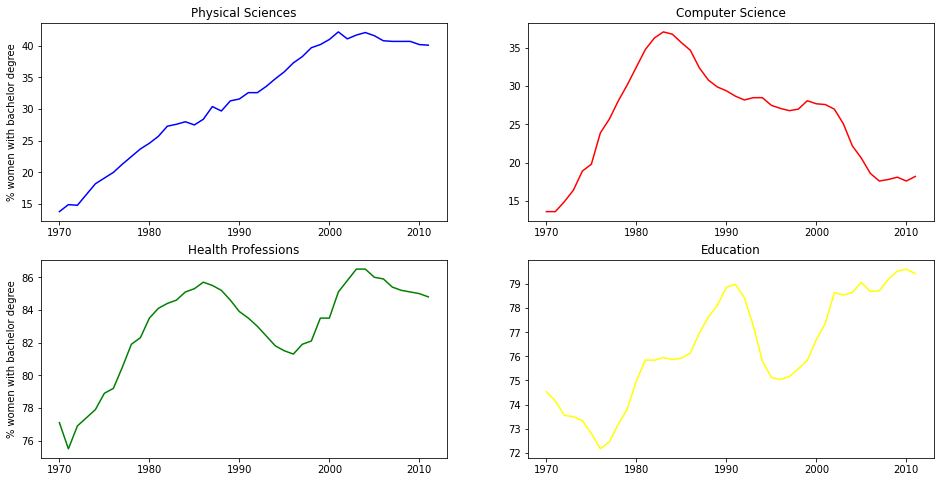

In [5]:
fig = plt.figure(figsize=(16,8))

plt.subplot(2, 2, 1)
plt.plot(women_bachelors['Year'], women_bachelors['Physical Sciences'], color='blue')
plt.ylabel('% women with bachelor degree')
plt.title('Physical Sciences')

plt.subplot(2, 2, 2)
plt.plot(women_bachelors['Year'], women_bachelors['Computer Science'], color='red')
plt.title('Computer Science')

plt.subplot(2, 2, 3)
plt.plot(women_bachelors['Year'], women_bachelors['Health Professions'], color='green')
plt.ylabel('% women with bachelor degree')
plt.title('Health Professions')

plt.subplot(2, 2, 4)
plt.plot(women_bachelors['Year'], women_bachelors['Education'], color='yellow')
plt.title('Education')
plt.show()

# Customizing axes
* You can use: 
    * `plt.xlim`
    * `plt.ylim`
* Or just 
    * `plt.axis`

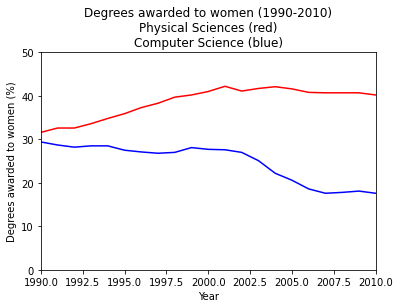

In [6]:
plt.plot(women_bachelors['Year'], women_bachelors['Physical Sciences'], color='red') 
plt.plot(women_bachelors['Year'], women_bachelors['Computer Science'], color='blue')

plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')

plt.xlim((1990, 2010))
plt.ylim((0, 50))
# plt.axis((1990, 2010, 0, 50))

plt.title('Degrees awarded to women (1990-2010)\nPhysical Sciences (red)\nComputer Science (blue)')
plt.show()

## plt.annotate, Axes.annotate

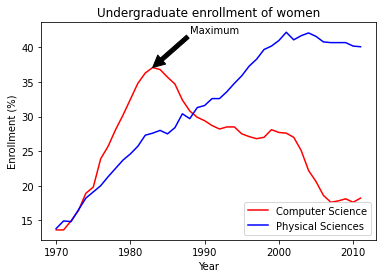

In [7]:
# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = women_bachelors['Computer Science'].max()

# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = women_bachelors['Year'][women_bachelors['Computer Science'].argmax()]

plt.plot(women_bachelors['Year'], women_bachelors['Computer Science'], color='red', label='Computer Science') 
plt.plot(women_bachelors['Year'], women_bachelors['Physical Sciences'], color='blue', label='Physical Sciences')
plt.legend(loc='lower right')
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max+5, cs_max+5), arrowprops={
    'facecolor': 'black'
})
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()

# 2-D arrays
Consider the above figure with X-axis ranging from -4 to 4 and Y-axis ranging from -5 to 5. So there are a total of (9 * 11) = 99 points marked in the figure each with a X-coordinate and a Y-coordinate. For any line parallel to the X-axis, the X-coordinates of the marked points respectively are `-4, -3, -2, -1, 0, 1, 2, 3, 4`. On the other hand, for any line parallel to the Y-axis, the Y-coordinates of the marked points from bottom to top are `-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5`. The `numpy.meshgrid` function returns two 2-Dimensional arrays representing the X and Y coordinates of all the points.
![meshgrid](./datasets/mesh04.png)

## `plt.pcolor` - displays as grid of pixels
pcolor - stands for psedo-color

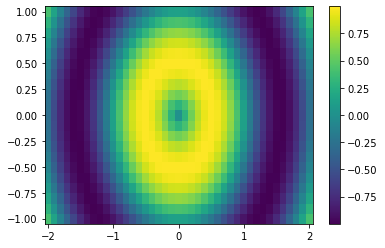

In [8]:
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)

X,Y = np.meshgrid(u, v)
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# plt.pcolor(Z) - dimensions will be used for x and y ticks
plt.pcolor(X, Y, Z, shading='auto')
plt.colorbar()
plt.show()

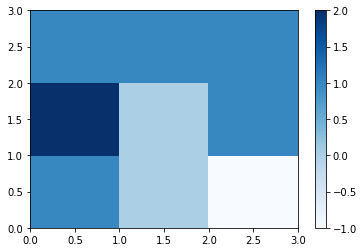

In [9]:
arr = np.array([
    [1, 0, -1], 
    [2, 0, 1], 
    [1, 1, 1]])
plt.pcolor(arr, cmap='Blues')
plt.colorbar()
plt.show()

## `plt.contour` - displays with continious lines

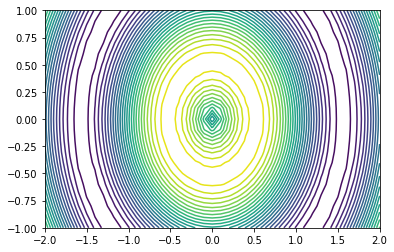

In [10]:
# levels - Determines the number and positions of the contour lines / regions.
plt.contour(X, Y, Z, levels=30) 
plt.show()

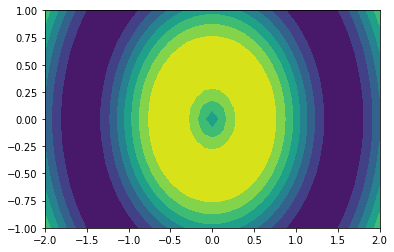

In [11]:
plt.contourf(X, Y, Z)
plt.show()

## Visualizing bivariate distributions

In [12]:
# for 1-D data, histogram is fundamental.
mpg = pd.read_csv('datasets/auto-mpg.csv')
mpg

mpg  cyl  displ   hp  weight  accel  yr  origin                 name  \
0    18.0    6  250.0   88    3139   14.5  71      US         ford mustang   
1     9.0    8  304.0  193    4732   18.5  70      US             hi 1200d   
2    36.1    4   91.0   60    1800   16.4  78    Asia     honda civic cvcc   
3    18.5    6  250.0   98    3525   19.0  77      US         ford granada   
4    34.3    4   97.0   78    2188   15.8  80  Europe            audi 4000   
..    ...  ...    ...  ...     ...    ...  ..     ...                  ...   
387  18.0    6  250.0   88    3021   16.5  73      US        ford maverick   
388  27.0    4  151.0   90    2950   17.3  82      US     chevrolet camaro   
389  29.5    4   98.0   68    2135   16.6  78    Asia      honda accord lx   
390  17.5    6  250.0  110    3520   16.4  77      US   chevrolet concours   
391  25.1    4  140.0   88    2720   15.4  78      US  ford fairmont (man)   

     color       size marker  
0      red  27.370336      o  
1    green  62.199511      o  
2     blue   9.000000      x  
3      red  34.515625      o  
4     blue  13.298178      s  
..     ...        ...    ...  
387    red  25.351225      o  
388   blue  24.173611      o  
389   blue  12.661736      x  
390    red  34.417778      o  
391   blue  20.551111      o  

[392 rows x 12 columns]

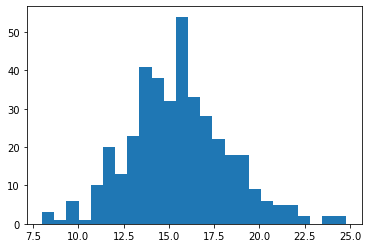

counts: [ 3.  1.  6.  1. 10. 20. 13. 23. 41. 38. 32. 54. 33. 28. 22. 18. 18.  9.
  6.  5.  5.  2.  0.  2.  2.]
bins: [ 8.     8.672  9.344 10.016 10.688 11.36  12.032 12.704 13.376 14.048
 14.72  15.392 16.064 16.736 17.408 18.08  18.752 19.424 20.096 20.768
 21.44  22.112 22.784 23.456 24.128 24.8  ]
patches: <BarContainer object of 25 artists>


In [13]:
counts, bins, patches = plt.hist(mpg['accel'], bins=25)
plt.show()
print('counts:', counts)
print('bins:', bins)
print('patches:', patches)

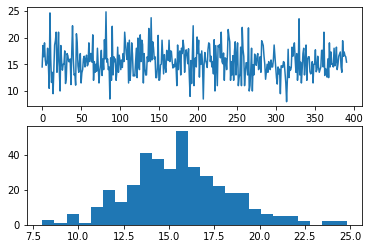

In [14]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(mpg['accel'])
ax[1].hist(mpg['accel'], bins=25)
plt.show()

### `plt.hist2d` and `plt.hexbin`
Both suitable for visualisation of 2d histograms. But `plt.hexbin` uses more sophisticated algorithm which makes it more difficult to interpret.

You can specify the rectangular region in which the samples are counted in constructing the 2D histogram. The optional parameter required is `range=((xmin, xmax), (ymin, ymax))` where
`xmin` and `xmax` are the respective lower and upper limits for the variables on the x-axis and
`ymin` and `ymax` are the respective lower and upper limits for the variables on the y-axis. Notice that the optional range argument can use nested tuples or lists.

`plt.hexbin` uses `extent=(xmin, xmax, ymin, ymax)` instead of` range`.

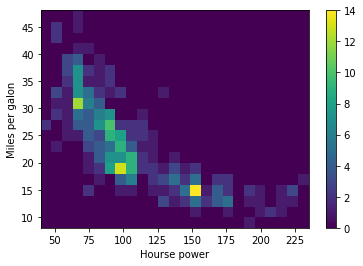

In [15]:
plt.hist2d(mpg['hp'], mpg['mpg'], bins=(25, 20), range=((40, 235), (8, 48)))
plt.colorbar()
plt.xlabel('Hourse power')
plt.ylabel('Miles per galon')
plt.show()

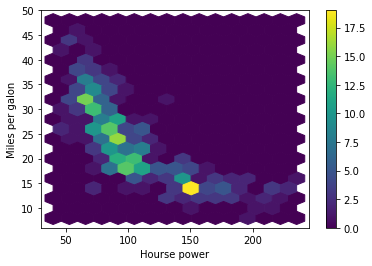

In [16]:
plt.hexbin(mpg['hp'], mpg['mpg'], gridsize=(15, 10), extent=(40, 235, 8, 48))
plt.colorbar()
plt.xlabel('Hourse power')
plt.ylabel('Miles per galon')
plt.show()

# Images

shape: (900, 900, 3)


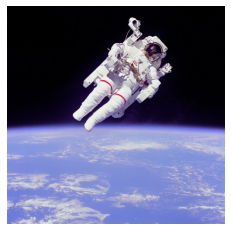

In [17]:
img = plt.imread('datasets/900px-Bruce_McCandless_II_during_EVA_in_1984.jpg')
print('shape:', img.shape) # 3d axis represent color

plt.imshow(img)
plt.axis('off')
plt.show()

## Psedocolor plot

shape: (900, 900, 3)
shape of intensity: (900, 900)


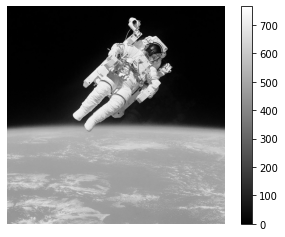

In [18]:
print('shape:', img.shape)

# Compute the sum of the red, green and blue channels: intensity
intensity = img.sum(axis=2)

# Print the shape of the intensity
print('shape of intensity:', intensity.shape)

# Display the intensity with a colormap of 'gray'
plt.imshow(intensity, 'gray')

# Add a colorbar
plt.colorbar()

# Hide the axes and show the figure
plt.axis('off')
plt.show()

The ratio of the displayed width to height is known as the image `aspect` and the range used to label the x- and y-axes is known as the image `extent`. The default `aspect` value of `'auto'` keeps the pixels square and the extents are automatically computed from the shape of the array if not specified otherwise.

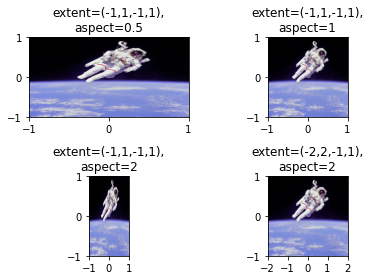

In [19]:
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1, 1, -1, 1), aspect=1)

plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1, 1, -1, 1), aspect=2)

plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-2, 2, -1, 1), aspect=2)

plt.tight_layout()
plt.show()

Sometimes, low contrast images can be improved by **rescaling** their intensities. For instance, this image of Hawkes Bay, New Zealand has no pixel values near 0 or near 255 (the limits of valid intensities). 

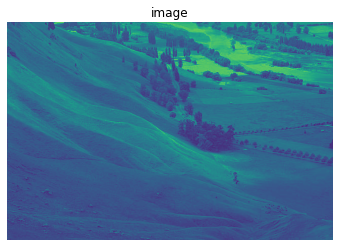

In [23]:
image = plt.imread('datasets/640px-Unequalized_Hawkes_Bay_NZ.jpg')

plt.title('image')
plt.axis('off')
plt.imshow(image)
plt.show()

The smallest & largest pixel intensities are 104 & 230.
The rescaled smallest & largest pixel intensities are 0.0 & 256.0.


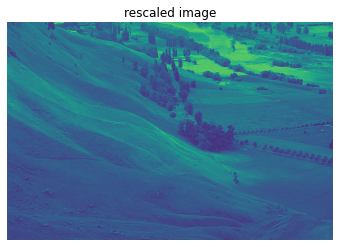

In [24]:
# Extract minimum and maximum values from the image: pmin, pmax
pmin, pmax = image.min(), image.max()
print("The smallest & largest pixel intensities are %d & %d." % (pmin, pmax))

# Rescale the pixels: rescaled_image
rescaled_image = 256 * (image - pmin) / (pmax - pmin)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." % 
      (rescaled_image.min(), rescaled_image.max()))

plt.title('rescaled image')
plt.axis('off')
plt.imshow(rescaled_image)

plt.show()